Download GNPS data <br>
Replace Job ID below with your GNPS job ID:

In [1]:
! curl -d "" 'https://gnps.ucsd.edu/ProteoSAFe/DownloadResult?task=b1a2c12dcf7d4fe49c8de616f2f2590a&view=download_cytoscape_data' -o GNPS_output_graphML.zip
! unzip -d GNPS_output_graphML/ GNPS_output_graphML.zip


Archive:  GNPS_output_graphML.zip
  inflating: GNPS_output_graphML/METABOLOMICS-SNETS-V2-b1a2c12d-download_cytoscape_data-main.graphml  
  inflating: GNPS_output_graphML/params.xml  
  inflating: GNPS_output_graphML/clusterinfo/f783bf50c3b64152ad5eb0443ee14d1d.clusterinfo  
  inflating: GNPS_output_graphML/clusterinfosummarygroup_attributes_withIDs_withcomponentID/1aa71bf519a146f5a22e9ff0256eab79.clustersummary  
  inflating: GNPS_output_graphML/networkedges_selfloop/d1df267375dc47efa023c29ae9128360..selfloop  
  inflating: GNPS_output_graphML/result_specnets_DB/c0c125797f3f48ae952136365c9d4a45.tsv  
  inflating: GNPS_output_graphML/groupmapping_converted/267b5739e9594fb8a32bc39e86870669.group  
  inflating: GNPS_output_graphML/qiime2_output/qiime2_emperor.qzv  
  inflating: GNPS_output_graphML/qiime2_output/qiime2_manifest.tsv  
  inflating: GNPS_output_graphML/qiime2_output/qiime2_metadata.tsv  
  inflating: GNPS_output_graphML/qiime2_output/qiime2_table.qza  
  inflating: GNPS_outp

## Tagtracker

load libraries

In [1]:
import sys
import os

In [2]:
sys.path.append('../Python/') 

In [3]:
import pandas as pd
from networkx import *
from tagtracker import *

load master source info sheet

In [4]:
si = '../example/GNPSTagTemplateMASTERMaster_Structure.tsv'

In [5]:
s = pd.read_csv(si, sep = '\t')

In [6]:
s.head()

,InChI_Key_Planar,TAGS,NCBITaxonomy,UBERONBodyPartName,Lifestyle_Tag
0,AAASNKNLMQBKFV,food,NaN,NaN,NaN
1,AABZZWPMCAZHFC,naturalproduct|bacterial|bacterial_produced,NaN,NaN,NaN
2,AACVPYUISGWNOU,naturalproduct,NaN,NaN,NaN
3,AADNEQWIZKTMBL,naturalproduct,NaN,NaN,NaN
4,AADVZSXPNRLYLV,naturalproduct,NaN,NaN,NaN


In [7]:
s.shape

(8548, 5)

load graphML file

In [8]:
graphMLfile = 'GNPS_output_graphML/' + [x for x in os.listdir('GNPS_output_graphML/') if 'METABOLOMICS' in x][0]

In [9]:
graphML = read_graphml(graphMLfile)

load GNPS library hits

In [10]:
DBfile = 'GNPS_output_graphML/result_specnets_DB/' + str(os.listdir('GNPS_output_graphML/result_specnets_DB/')[0])

In [11]:
libhits = pd.read_csv(DBfile, sep = '\t')

In [12]:
libhits.head()

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,FileScanUniqueID,NumberHits,tags,MoleculeExplorerDatasets,MoleculeExplorerFiles,InChIKey,InChIKey-Planar,superclass,class,subclass
0,CCMSLIB00000006062,Vorinostat,LC-ESI,qTof,Isolated,Sirenas,Ed Esquenazi,M+H,265.156,0.0,...,spectra/specs_ms.pklbin1167,1,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,CCMSLIB00000006062,Vorinostat,LC-ESI,qTof,Isolated,Sirenas,Ed Esquenazi,M+H,265.156,0.0,...,spectra/specs_ms.pklbin1169,1,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,CCMSLIB00000214324,Massbank:FIO00476 Amitryptiline,ESI,LC-ESI-QTOF,Isolated,Putative Massbank Match,Massbank,[M+H]+,278.191,0.0,...,spectra/specs_ms.pklbin1359,1,drug[Chemical Family],29,423,KRMDCWKBEZIMAB-UHFFFAOYSA-N,KRMDCWKBEZIMAB,NaN,NaN,NaN
3,CCMSLIB00003135135,Spectral Match to DL-Indole-3-lactic acid from...,ESI,Q-TOF,Isolated,Data from Dorrestein,Data deposited by quinnr,M+H-H2O,188.070,0.0,...,spectra/specs_ms.pklbin141,1,NaN,95,8144,NaN,NaN,NaN,NaN,NaN
4,CCMSLIB00003135135,Spectral Match to DL-Indole-3-lactic acid from...,ESI,Q-TOF,Isolated,Data from Dorrestein,Data deposited by quinnr,M+H-H2O,188.070,0.0,...,spectra/specs_ms.pklbin142,1,NaN,95,8144,NaN,NaN,NaN,NaN,NaN


create a graphML file that only contains features from any of the columns and source types selected 

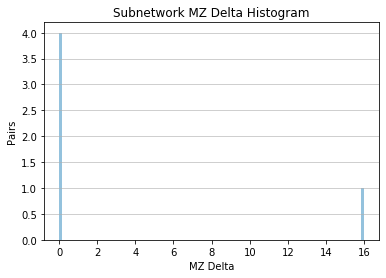

In [15]:
Filtered = tagtracker(s, libhits, graphML, source = 'drug|human', tag = 'TAGS')

In [16]:
nx.write_graphml(Filtered, "FilteredNetwork.graphml")